<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_11_SGD_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'> Stochastic Gradient Descent(SGD)**
- This model optimizes the log-loss function using LBFGS(Quasi-Newton methods) or stochastic gradient descent.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

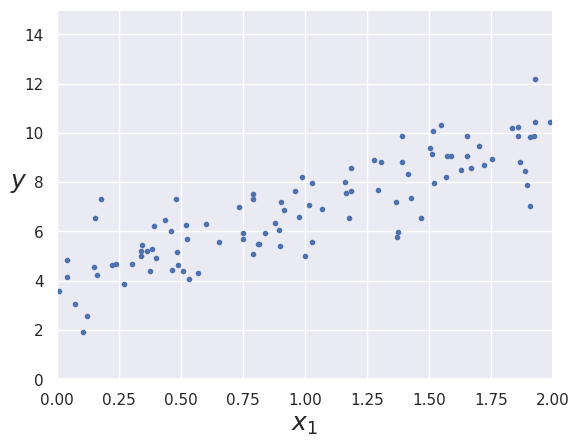

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 선형대수로 예측

array([[3.88793407],
       [3.03635926]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

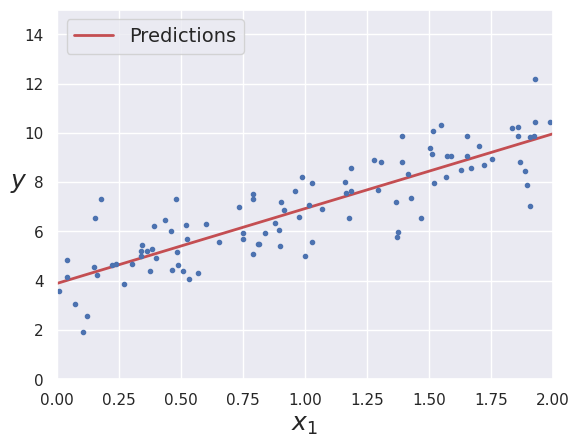

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear regression API로 예측

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([3.88793407]), array([[3.03635926]]))

## SGD로 예측

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X[0:3]
X_b[0:3]

array([[0.12056383],
       [1.16603461],
       [1.86051453]])

array([[1.        , 0.12056383],
       [1.        , 1.16603461],
       [1.        , 1.86051453]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

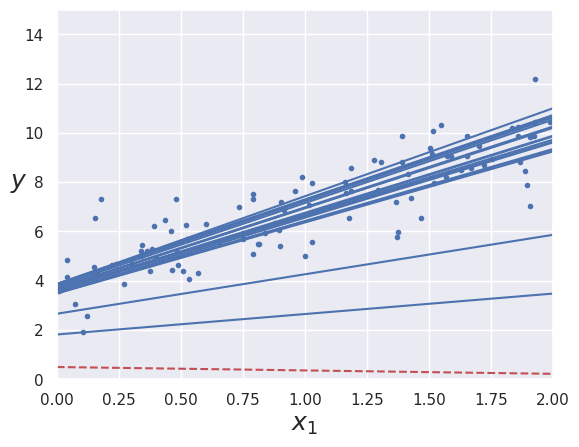

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

## 3가지 선형모델 알고리즘 (fit, predict) 비교
#### 데이터 불러오기

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.feature_names.extend(housing.target_names)
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
#df=df.sample(frac=0.1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.corr()[-1:]

X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


## 1. Ordinary Least Squares (statisitc models API)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                        0.00
Time:                        09:38:05   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2. Regression (scikit learn API)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False) # #print('Intercept: \n', reg.intercept_)

# Train the model using the training sets
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

LinearRegression(fit_intercept=False)

Coefficients: 
 [0.49376576 0.01487299]
Mean squared error: 0.74
Coefficient of determination: 0.45


## 3. Stochastic gradient descent

In [ ]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=1000)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
model.get_params()                                   #  학습한 모델 내부 저장
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

model.coef_
model.intercept_

SGDRegressor()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

모델의 Mean squared error는 :0.7164


array([ 0.45305747, -0.07552983])

array([0.60026725])

## 4. Multi-layer Perceptron(MLP)
- This model optimizes the log-loss function using LBFGS(Quasi-Newton methods) or stochastic gradient descent.

In [ ]:
from sklearn.neural_network import MLPRegressor     # 알고리즘 불러오고 데이터 준비하기
model = MLPRegressor(max_iter=500)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')

MLPRegressor(max_iter=500)

모델의 Mean squared error는 :0.6063


## 5. Shallow learning with Keras

In [ ]:
# prompt: keras deeplearning으로 예측

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are defined as in the provided code
# ... (Your existing code for defining X and y) ...

# Define the Keras model
model = Sequential()
model.add(Dense(64, activation='relu',
                input_shape=(X.shape[1],))) # Input layer
model.add(Dense(32, activation='relu')) # Hidden layer
model.add(Dense(1)) # Output layer (regression)

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae']) # Mean Squared Error, Mean Absolute Error

# Train the model
model.fit(X, y, epochs=10,
          batch_size=32,
          verbose=1) # Adjust epochs and batch size as needed

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
loss, mae = model.evaluate(X, y, verbose=0)
print(f"Mean Squared Error: {loss:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Epoch 1/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.9475 - mae: 0.9007
Epoch 2/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6572 - mae: 0.5975
Epoch 3/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6355 - mae: 0.5851
Epoch 4/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6341 - mae: 0.5845
Epoch 5/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6224 - mae: 0.5809
Epoch 6/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6166 - mae: 0.5781
Epoch 7/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6196 - mae: 0.5804
Epoch 8/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6321 - mae: 0.5876
Epoch 9/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6431 - mae: 0.5919
Epoch 10/10
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6202 - mae: 0.5781


645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.6504
Mean Absolute Error: 0.6329


In [ ]:
# prompt: pythorch로

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x


# Instantiate the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = RegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
batch_size = 32
for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i + batch_size]
        targets = y_train[i:i + batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test)
    mse = criterion(y_pred, y_test)
    print(f"Test MSE: {mse.item():.4f}")

Epoch [10/10], Loss: 0.3016
Test MSE: 0.3195


# End